In [99]:
import sys
sys.path.append('../cloud_classifier')

import cloud_classifier

import importlib
import xarray as xr

importlib.reload(cloud_classifier)



<module 'cloud_classifier' from '/home/squidy/tropos/notebooks/../cloud_classifier/cloud_classifier.py'>

In [100]:
cc = cloud_classifier.cloud_classifier()
path = "../classifiers"
name = "new_classifier_1"
#cc.create_new_project(name = name, path = path
cc.set_project_path("../classifiers/new_classifier_1")

In [101]:
label_file = "../data/input_data/labels/nwcsaf_msevi-medi-20190318_1100.nc"
input_file = "../data/input_data/msevi-medi-20190318_1100.nc"
georef = "../data/training_data/msevi-medi-georef.nc"

cc.check_nwcsaf_version(filename = label_file, verbose = True)

The cloud type data is coded after the old (2013) standard


'v2013'

In [102]:
#cc.run_training_pipeline()
cc.load_classifier(reload = True)


Classifier loaded!


In [103]:
cc.create_reference_labelfile(label_file)

In [107]:
cc.apply_mask()
vectors, indices = cc.create_input_vectors(input_file, verbose = True)
labels = cc.predict_labels(vectors, verbose = True)
xr_labels = cc.make_xrData(labels, indices)

Masked indices set!
Input vectors created!
Predicted Labels!
../classifiers/new_classifier_1/data/label_reference.nc


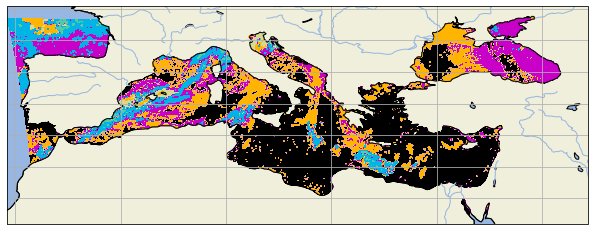

In [105]:
cc.plot_labels(data = xr_labels, georef_file = georef, reduce_to_mask = True)

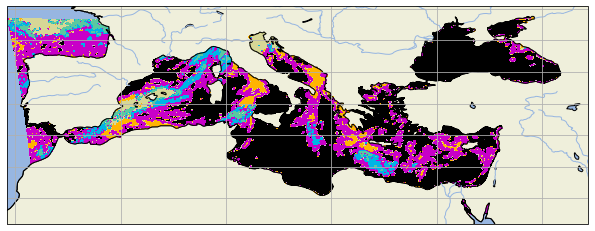

In [106]:
cc.plot_labels(data_file = label_file, georef_file = georef, reduce_to_mask = True )